In [40]:
# Importation des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm  # Pour la barre de progression

# Configuration de la visualisation
sns.set(style="whitegrid")

# Définir le chemin des données
data_path = "C:/Users/vikne/Documents/Master 2/Semestre 9/Intelligence artificielle/Travel-Order-Resolver/ai/path_algorithm/dataset/"

In [41]:
# Chargement des fichiers CSV
gares_voyageurs = pd.read_csv(f"{data_path}gares-de-voyageurs.csv", sep=";")
liste_gares = pd.read_csv(f"{data_path}liste-des-gares.csv", sep=";")
timetables = pd.read_csv(f"{data_path}timetables.csv", sep="\t", engine='python')

# Affichage des premières lignes des fichiers pour vérifier leur contenu
print("Garess de Voyageurs:")
display(gares_voyageurs.head())

print("Liste des Gares:")
display(liste_gares.head())

print("Timetables:")
display(timetables.head())

# Vérification des colonnes des fichiers
print("Colonnes dans timetables:", timetables.columns)
print("Colonnes dans gares_voyageurs:", gares_voyageurs.columns)
print("Colonnes dans liste_gares:", liste_gares.columns)


Garess de Voyageurs:


,Nom,Trigramme,Segment(s) DRG,Position géographique,Code commune,Code(s) UIC
0,Abancourt,ABT,C,"49.6852237, 1.7743058",60001,87313759
1,Abbaretz,AAR,C,"47.5546432, -1.5244159",44001,87481614
2,Abbeville,ABB,B,"50.10221, 1.82449",80001,87317362
3,Ablon-sur-Seine,ABL,B,"48.725468, 2.419151",94001,87545269
4,Achères Grand Cormier,GCR,B,"48.9551835, 2.0919031",78551,87386052


Liste des Gares:


,CODE_UIC,LIBELLE,FRET,VOYAGEURS,CODE_LIGNE,RG_TRONCON,PK,COMMUNE,DEPARTEMEN,IDRESEAU,IDGAIA,X_L93,Y_L93,X_WGS84,Y_WGS84,C_GEO,Geo Point,Geo Shape
0,87009696,La Douzillère,N,O,594000,1,244+100,JOUE-LES-TOURS,INDRE-ET-LOIRE,4650,d9dc0092-6667-11e3-89ff-01f464e0362d,522803.9864,6.695782e+06,0.653001,47.338661,"47.33866140621093, 0.6530013866824887","47.338661406198106, 0.6530013866824868","{""coordinates"": [0.653001386682487, 47.3386614..."
1,87142554,Châtillon-sur-Seine,O,N,839000,1,035+431,SAINTE-COLOMBE-SUR-SEINE,COTE-D'OR,9201,29d3de32-dfbc-11e3-a2ff-01a464e0362d,815990.5833,6.753363e+06,4.551565,47.870404,"47.87040423667916, 4.551565119152175","47.87040423666789, 4.551565119152176","{""coordinates"": [4.551565119152176, 47.8704042..."
2,87382218,La Défense,N,O,973000,1,008+295,PUTEAUX,HAUTS-DE-SEINE,4648,c0d4c69a-f312-11e3-90ff-015864e0362d,644164.1873,6.866206e+06,2.238472,48.893437,"48.89343723770491, 2.2384716845345993","48.89343723768303, 2.2384716845345984","{""coordinates"": [2.238471684534598, 48.8934372..."
3,87718122,Byans,N,O,871000,1,015+118,BYANS-SUR-DOUBS,DOUBS,3446,297c8c1e-dfbc-11e3-a2ff-01a464e0362d,916198.4419,6.672579e+06,5.852088,47.118329,"47.11832925172662, 5.852088069196292","47.11832925171314, 5.852088069196295","{""coordinates"": [5.852088069196295, 47.1183292..."
4,87721829,Chamelet,N,O,775000,1,074+576,CHAMELET,RHONE,3578,d9cff2d6-6667-11e3-89ff-01f464e0362d,816664.1967,6.543552e+06,4.507016,45.981670,"45.98167025804158, 4.507016244543598","45.98167025802479, 4.5070162445436","{""coordinates"": [4.5070162445436, 45.981670258..."


Timetables:


,trip_id,trajet,duree
0,OCESN003100F140147152,Gare de Le Havre - Gare de Paris-St-Lazare,138
1,OCESN003190F040047309,Gare de Dieppe - Gare de Paris-St-Lazare,145
2,OCESN003198F030037315,Gare de Paris-St-Lazare - Gare de Rouen-Rive-D...,97
3,OCESN003300F030037323,Gare de Cherbourg - Gare de Paris-St-Lazare,194
4,OCESN003313F380387526,Gare de Caen - Gare de Paris-St-Lazare,149


Colonnes dans timetables: Index(['trip_id', 'trajet', 'duree'], dtype='object')
Colonnes dans gares_voyageurs: Index(['Nom', 'Trigramme', 'Segment(s) DRG', 'Position géographique',
       'Code commune', 'Code(s) UIC'],
      dtype='object')
Colonnes dans liste_gares: Index(['CODE_UIC', 'LIBELLE', 'FRET', 'VOYAGEURS', 'CODE_LIGNE', 'RG_TRONCON',
       'PK', 'COMMUNE', 'DEPARTEMEN', 'IDRESEAU', 'IDGAIA', 'X_L93', 'Y_L93',
       'X_WGS84', 'Y_WGS84', 'C_GEO', 'Geo Point', 'Geo Shape'],
      dtype='object')


In [42]:
# Fonction pour extraire les noms des gares à partir du trajet
def extract_station_names(trajet):
    return [station.strip() for station in trajet.split(" - ")]

# Barre de progression
tqdm.pandas()

# Extraction des gares et des villes depuis timetables
timetables["stations"] = timetables["trajet"].apply(extract_station_names)
stations_flat = timetables["stations"].explode()

# Création d'un DataFrame pour les gares
stations_villes = stations_flat.to_frame(name="Nom_Gare").drop_duplicates()

# Associer les villes
stations_villes = stations_villes.merge(
    gares_voyageurs[["Nom", "Position géographique"]].rename(columns={"Nom": "Nom_Gare"}),
    on="Nom_Gare", how="left"
)

# Extraction de la ville
stations_villes["Ville"] = stations_villes["Nom_Gare"].apply(lambda x: " ".join(x.split()[2:]) if len(x.split()) > 2 else x)

# Création du nom simplifié
stations_villes["Nom_Simple"] = stations_villes["Nom_Gare"].apply(lambda x: x.replace("Gare de ", "") if "Gare de" in x else x)

# Sélection des colonnes finales
stations_villes = stations_villes[["Nom_Gare", "Ville", "Nom_Simple"]]

# Sauvegarde dans un fichier CSV
stations_villes.to_csv(f"{data_path}stations_villes.csv", index=False, sep=";")


In [43]:
# Nettoyage des noms des gares
def clean_station_name(station_name):
    if station_name.startswith("Gare de "):
        return station_name[len("Gare de "):]
    return station_name

# Extraction des gares de départ et d'arrivée et nettoyage des noms
timetables["stations"] = timetables["trajet"].apply(extract_station_names)
timetables["gare_a"] = timetables["stations"].apply(lambda x: clean_station_name(x[0]))  # Gare de départ
timetables["gare_b"] = timetables["stations"].apply(lambda x: clean_station_name(x[1]))  # Gare d'arrivée

# Associer les villes aux gares
def get_city_for_station(station_name):
    city_row = stations_villes[stations_villes["Nom_Simple"] == station_name]
    if not city_row.empty:
        return city_row["Ville"].values[0]
    return ""

# Créer les colonnes pour les villes de départ et d'arrivée
timetables["gare_a_city"] = timetables["gare_a"].apply(get_city_for_station)
timetables["gare_b_city"] = timetables["gare_b"].apply(get_city_for_station)

# Sélectionner les colonnes nécessaires pour le fichier de sortie
output_columns = ["trip_id", "trajet", "duree", "gare_a", "gare_b", "gare_a_city", "gare_b_city"]
timetables_output = timetables[output_columns]

# Sauvegarde du fichier CSV généré
timetables_output.to_csv(f"{data_path}timetables_with_cities.csv", index=False, sep=";")


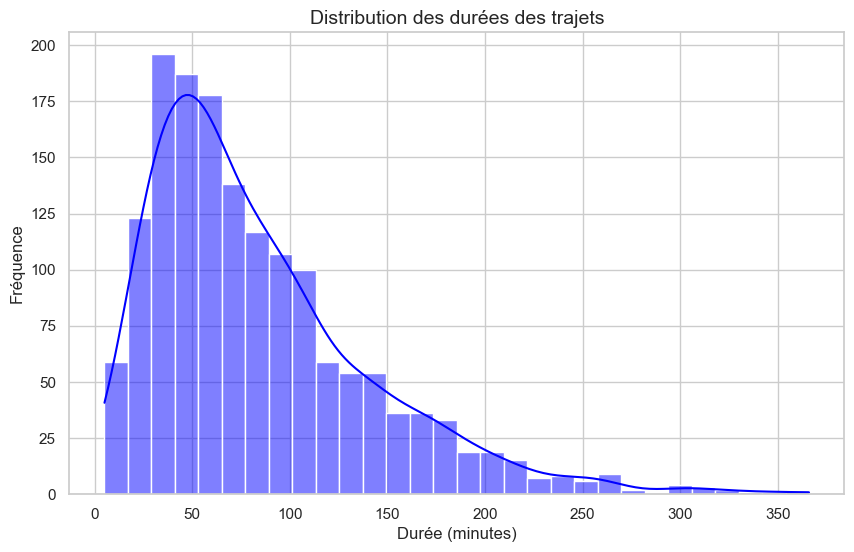

In [44]:
# Visualisation de la distribution des durées des trajets
plt.figure(figsize=(10, 6))
sns.histplot(timetables["duree"], kde=True, color="blue", bins=30)
plt.title("Distribution des durées des trajets", fontsize=14)
plt.xlabel("Durée (minutes)", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)
plt.show()


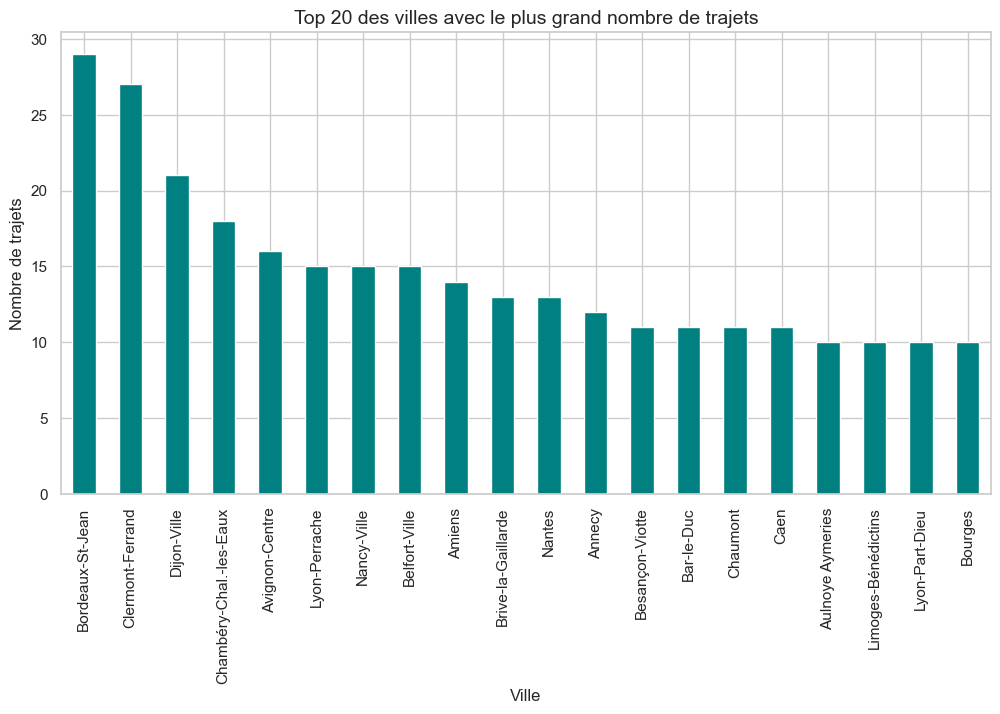

In [45]:
# Création d'un graphique des trajets par ville
plt.figure(figsize=(12, 6))

# Comptage du nombre de trajets par ville
trajets_par_ville = timetables.groupby("gare_a_city").size()

# Tracer l'histogramme du nombre de trajets par ville
trajets_par_ville.sort_values(ascending=False).head(20).plot(kind='bar', color="teal")
plt.title("Top 20 des villes avec le plus grand nombre de trajets", fontsize=14)
plt.xlabel("Ville", fontsize=12)
plt.ylabel("Nombre de trajets", fontsize=12)
plt.xticks(rotation=90)
plt.show()


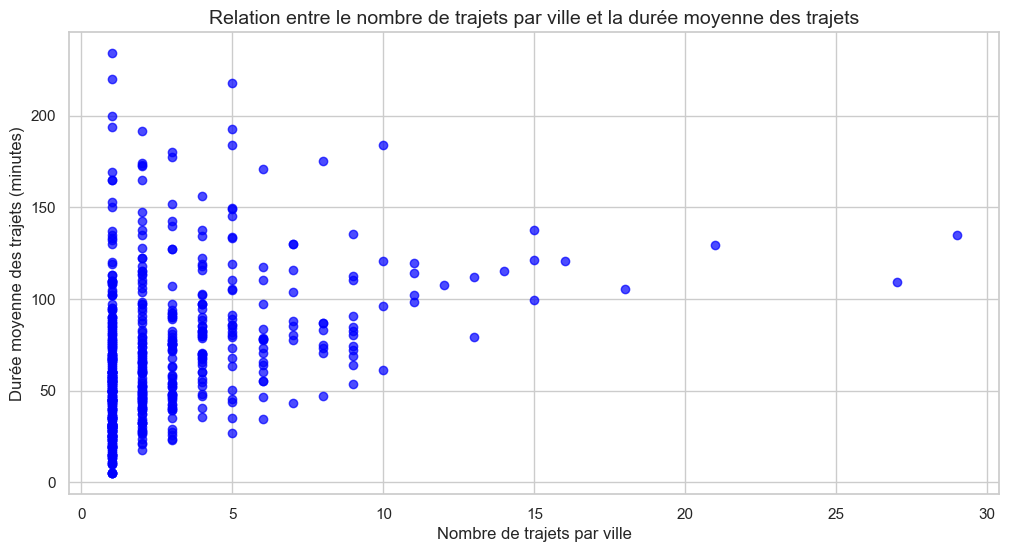

In [46]:
# Création du scatter plot entre la durée des trajets et le nombre de trajets par ville
plt.figure(figsize=(12, 6))

# Comptage du nombre de trajets par ville
trajets_par_ville = timetables.groupby("gare_a_city").size()

# Récupération des durées moyennes par ville
duree_par_ville = timetables.groupby("gare_a_city")["duree"].mean()

# Tracer le scatter plot
plt.scatter(trajets_par_ville, duree_par_ville, color="blue", alpha=0.7)

plt.title("Relation entre le nombre de trajets par ville et la durée moyenne des trajets", fontsize=14)
plt.xlabel("Nombre de trajets par ville", fontsize=12)
plt.ylabel("Durée moyenne des trajets (minutes)", fontsize=12)
plt.show()


In [47]:
# Résumé des résultats
print("Résumé des résultats de l'analyse:")
print(f"Nombre total de trajets analysés: {len(timetables)}")
print(f"Nombre de gares uniques trouvées: {stations_villes['Nom_Simple'].nunique()}")
print(f"Nombre de villes distinctes associées: {stations_villes['Ville'].nunique()}")

# Conclusions et recommandations pour la suite de l'analyse
print("\nConclusions:")
print("1. Une forte répartition des gares est observée dans certaines villes.")
print("2. Des patterns intéressants peuvent être explorés entre la durée des trajets et les distances.")


Résumé des résultats de l'analyse:
Nombre total de trajets analysés: 1575
Nombre de gares uniques trouvées: 818
Nombre de villes distinctes associées: 818

Conclusions:
1. Une forte répartition des gares est observée dans certaines villes.
2. Des patterns intéressants peuvent être explorés entre la durée des trajets et les distances.
